In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
scaler=StandardScaler()


In [75]:
data = pd.read_csv("sensor.csv")
data['timestamp'] = pd.to_datetime(data["timestamp"])
data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [76]:
percentage_missing = data.isnull().sum().sort_values(ascending=False)/len(data)*100
percentage_missing.head() # show 5 largest missing %

sensor_15    100.000000
sensor_50     34.956881
sensor_51      6.982117
sensor_00      4.633261
sensor_07      2.474129
dtype: float64

In [77]:
# drop low quality columns
data.drop(['sensor_15', 'sensor_50'],inplace = True,axis=1)
# set timestamp to date
data['timestamp'] = pd.to_datetime(data['timestamp'])
data = data.set_index('timestamp')

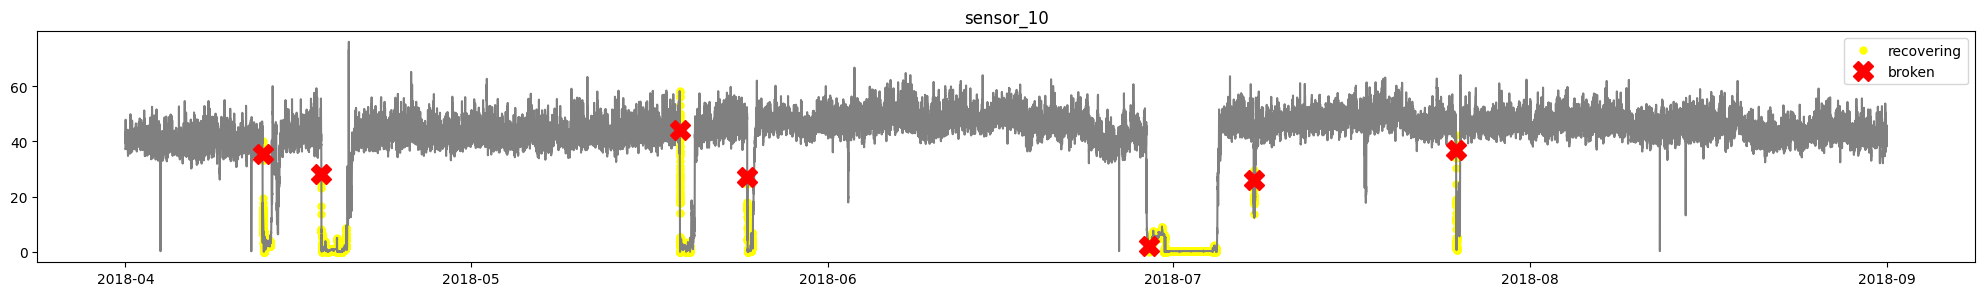

In [79]:
broken_rows = data[data['machine_status']=='BROKEN']
recovery_rows = data[data['machine_status']=='RECOVERING']
normal_rows = data[data['machine_status']=='NORMAL']

def plot_sensor(sensor):
    plot = plt.figure(figsize=(25,3))
    plot = plt.plot(recovery_rows[sensor], linestyle='none', marker='o', color='yellow', markersize=5, label='recovering')
    plot = plt.plot(data[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='X', color='red', markersize=14, label = 'broken')
    plot = plt.title(sensor)
    plot = plt.legend()
    plt.show()
# plot sensor 10
plot_sensor('sensor_10')

In [91]:
m, n = data.shape
X = data.iloc[:3] # ignore machine status columns
X = X.fillna(X.mean())
X.shape

C:\Users\marsh\AppData\Local\Temp\ipykernel_11076\1198873322.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = X.fillna(X.mean())


(3, 52)

In [90]:
X

""
timestamp
2018-04-01 00:03:00
2018-04-01 00:04:00
2018-04-01 00:05:00
2018-04-01 00:06:00
2018-04-01 00:07:00
...
2018-08-31 23:55:00
2018-08-31 23:56:00
2018-08-31 23:57:00


In [ ]:
grouped_data = data.groupby(pd.Grouper(key='timestamp', freq='M'))
# loopeble dataframe for splitting
dfs = [group for _,group in grouped_data]

In [ ]:
train_data = dfs[:3] # train data array

test_data = dfs[3:7] # test data array 


[       Unnamed: 0           timestamp  sensor_00  sensor_01  sensor_02  \
 0               0 2018-04-01 00:00:00   2.465394  47.092010  53.211800   
 1               1 2018-04-01 00:01:00   2.465394  47.092010  53.211800   
 2               2 2018-04-01 00:02:00   2.444734  47.352430  53.211800   
 3               3 2018-04-01 00:03:00   2.460474  47.092010  53.168400   
 4               4 2018-04-01 00:04:00   2.445718  47.135410  53.211800   
 ...           ...                 ...        ...        ...        ...   
 43195       43195 2018-04-30 23:55:00   2.453588  44.965275  50.434020   
 43196       43196 2018-04-30 23:56:00   2.453588  44.965275  50.434025   
 43197       43197 2018-04-30 23:57:00   2.455556  44.965275  50.434025   
 43198       43198 2018-04-30 23:58:00   2.454572  44.965275  50.434020   
 43199       43199 2018-04-30 23:59:00   2.453588  44.965270  50.390620   
 
        sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
 0      46.310760

[]